In [41]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sb

In [42]:
df = pd.read_csv('student_admission_dataset.csv')
print(df.info())
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GPA                         250 non-null    float64
 1   SAT_Score                   250 non-null    int64  
 2   Extracurricular_Activities  250 non-null    int64  
 3   Admission_Status            250 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 7.9+ KB
None
    GPA  SAT_Score  Extracurricular_Activities Admission_Status
0  3.46       1223                           8         Rejected
1  2.54        974                           8         Rejected
2  2.91        909                           9         Rejected
3  2.83       1369                           5         Accepted
4  3.60       1536                           7         Accepted


In [51]:
Student_GPA = np.array(df["GPA"])
Student_SAT = np.array(df["SAT_Score"])
Student_ECA = np.array(df["Extracurricular_Activities"])
Student_AdmissionStatus = np.array(df["Admission_Status"])
arr = np.array(df)

#Storing cateogorical Data (student admissions) as numerical Data in a different array:
Student_AdmissionStatus1 = Student_AdmissionStatus.copy()
for index, value in enumerate(Student_AdmissionStatus1):
    if value == "Rejected":
        Student_AdmissionStatus1[index] = int(0)
    elif value == "Waitlisted":
        Student_AdmissionStatus1[index] = int(1)
    elif value == "Accepted":
        Student_AdmissionStatus1[index] = int(2)

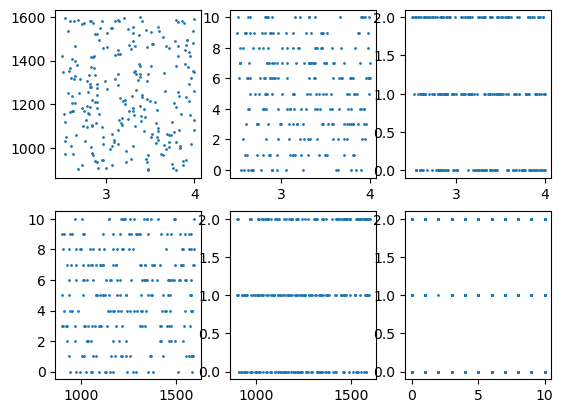

In [53]:
# 2D plots
#Creating 6 subplots (6C2) in a 3x2 grid to visualize the data and to figure out any correlations
plt.subplot(2,3,1)
plt.scatter(Student_GPA,Student_SAT, s=1)
plt.subplot(2,3,2)
plt.scatter(Student_GPA,Student_ECA, s=1)
plt.subplot(2,3,3)
plt.scatter(Student_GPA,Student_AdmissionStatus1, s=1)
plt.subplot(2,3,4)
plt.scatter(Student_SAT,Student_ECA, s=1)
plt.subplot(2,3,5)
plt.scatter(Student_SAT,Student_AdmissionStatus1, s=1)
plt.subplot(2,3,6)
plt.scatter(Student_ECA,Student_AdmissionStatus1, s=1)
plt.show()


{'Rejected': 81, 'Waitlisted': 88, 'Accepted': 81}
[81 88 81]


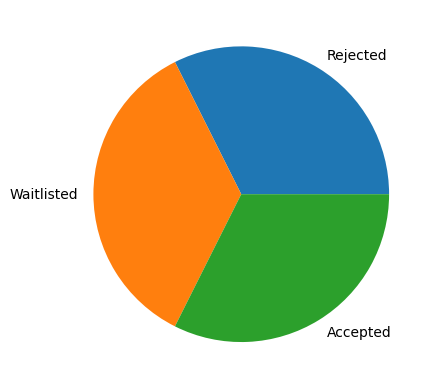

In [55]:
AdmissionDict = {"Rejected": 0, "Waitlisted": 0, "Accepted": 0}
count = 0
for x in Student_AdmissionStatus:
    count += 1
    if x == "Rejected":
        AdmissionDict["Rejected"] += 1
    elif x == "Waitlisted":
        AdmissionDict["Waitlisted"] += 1
    elif x == "Accepted":
        AdmissionDict["Accepted"] +=1
print(AdmissionDict)
AdmissionStat = np.array([AdmissionDict["Rejected"],AdmissionDict["Waitlisted"],AdmissionDict["Accepted"]])
print(AdmissionStat)
plt.pie(AdmissionStat, labels=["Rejected","Waitlisted","Accepted"])
plt.show()


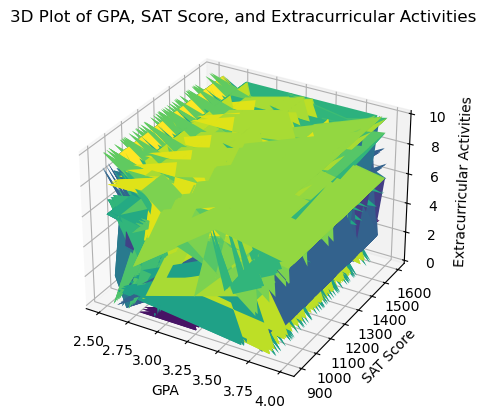

In [30]:
#3D plots:

#Meshgrid Creation: np.meshgrid is used to create a 2D grid of GPA and SAT scores.
GPA, SAT = np.meshgrid(Student_GPA, Student_SAT)
#The Extracurricular_Activities data is replicated to match the dimensions using np.tile.
ECA = np.tile(Student_ECA, (len(Student_GPA), 1))


# Plotting the surface
fig = plt.figure()
ax = plt.axes(projection='3d')
surface = ax.plot_surface(GPA, SAT, ECA, cmap='viridis', edgecolor='none')
ax.set_title("3D Plot of GPA, SAT Score, and Extracurricular Activities")
ax.set_xlabel('GPA')
ax.set_ylabel('SAT Score')
ax.set_zlabel('Extracurricular Activities')
plt.show()

In [58]:
print("Mean of GPA:",Student_GPA.mean())
print("Mean of SAT:",Student_SAT.mean())
print("Mean of ECA:",Student_ECA.mean())
print("Mean of admission status",Student_AdmissionStatus1.mean())

Mean of GPA: 3.2383200000000003
Mean of SAT: 1250.432
Mean of ECA: 5.204
Mean of admission status 1.0


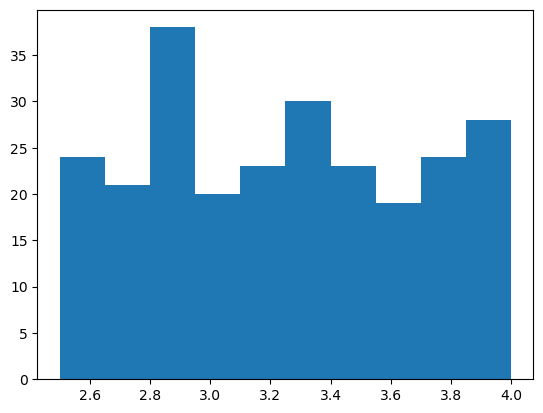

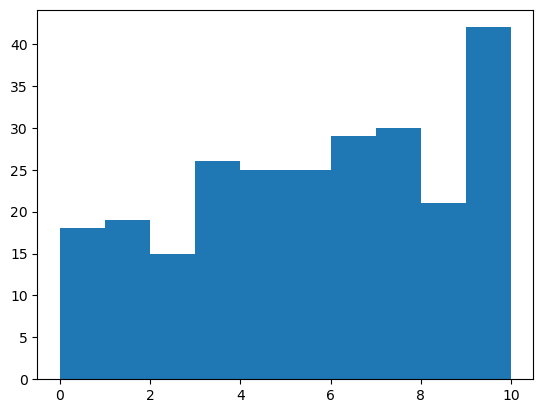

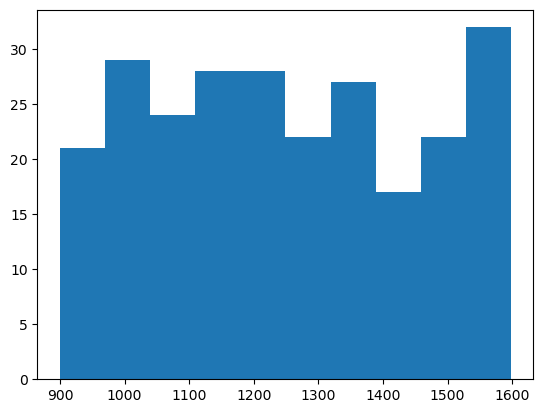

In [32]:
plt.hist(Student_GPA)
plt.show()
plt.hist(Student_ECA)
plt.show()
plt.hist(Student_SAT)
plt.show()

In [59]:
print("Standard Deviation of GPA:",Student_GPA.std())
print("Standard Deviation of ECA:",Student_ECA.std())
print("Standard Deviation  of SAT:",Student_SAT.std())

Standard Deviation of GPA: 0.4377291144075295
Standard Deviation of ECA: 2.958780830004142
Standard Deviation  of SAT: 204.32328642619274


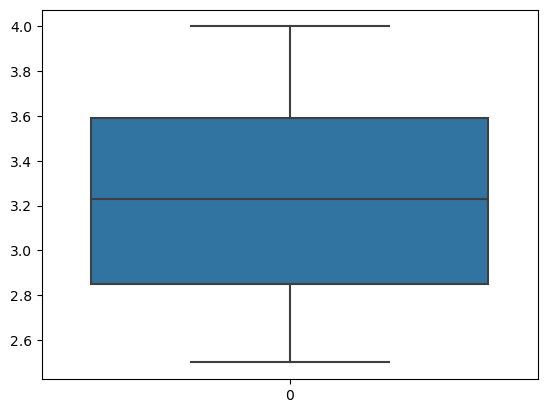

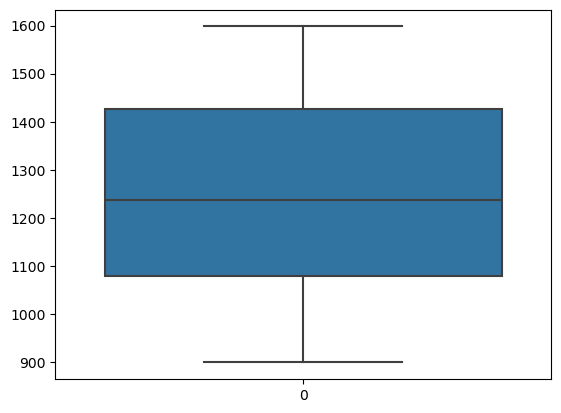

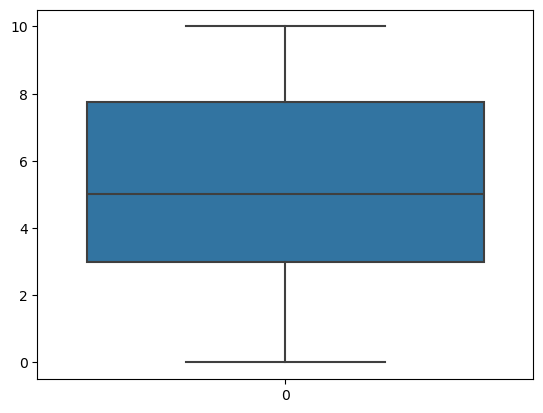

In [34]:
sb.boxplot(Student_GPA)
plt.show()
sb.boxplot(Student_SAT)
plt.show()
sb.boxplot(Student_ECA)
plt.show()


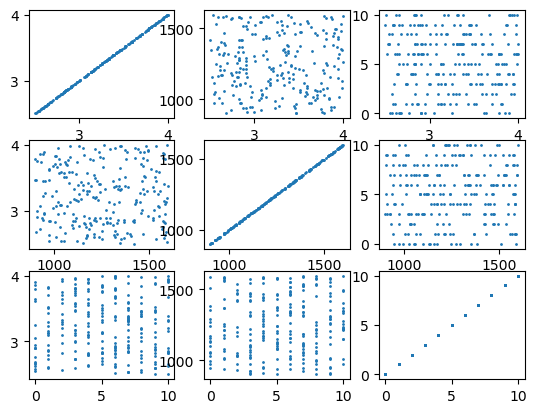

In [35]:
#Scatter Matrix
plt.subplot(3,3,1)
plt.scatter(Student_GPA,Student_GPA, s=1) #S is size of marker
plt.subplot(3,3,2)
plt.scatter(Student_GPA, Student_SAT, s=1)
plt.subplot(3,3,3)
plt.scatter(Student_GPA,Student_ECA, s=1)
plt.subplot(3,3,4)
plt.scatter(Student_SAT, Student_GPA, s=1)
plt.subplot(3,3,5)
plt.scatter(Student_SAT,Student_SAT, s=1)
plt.subplot(3,3,6)
plt.scatter(Student_SAT,Student_ECA, s=1)
plt.subplot(3,3,7)
plt.scatter(Student_ECA,Student_GPA, s=1)
plt.subplot(3,3,8)
plt.scatter(Student_ECA,Student_SAT, s=1)
plt.subplot(3,3,9)
plt.scatter(Student_ECA,Student_ECA, s=1)
plt.show()

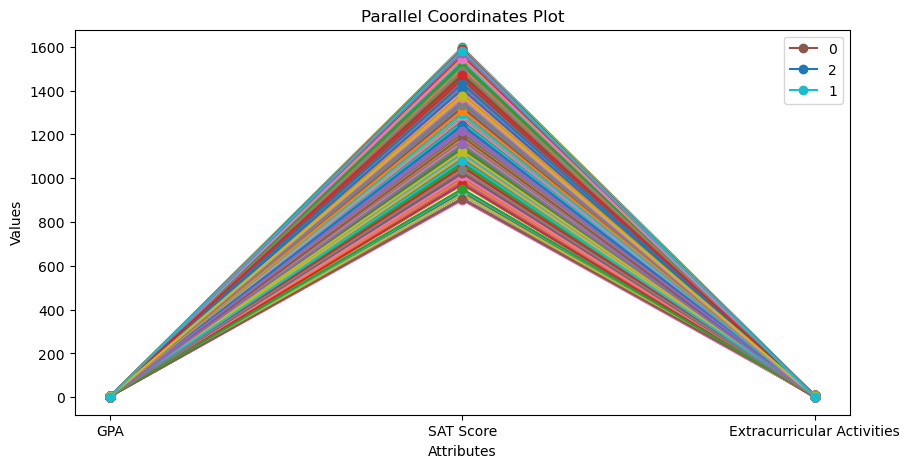

In [36]:
data = np.array([Student_GPA, Student_SAT, Student_ECA]).T

# Plotting
plt.figure(figsize=(10, 5))

# Plot each student's data
for i in range(data.shape[0]):
    plt.plot(data[i], marker='o', label=Student_AdmissionStatus[i])

# Adding labels
plt.xticks([0, 1, 2], ['GPA', 'SAT Score', 'Extracurricular Activities'])
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.title('Parallel Coordinates Plot')

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()

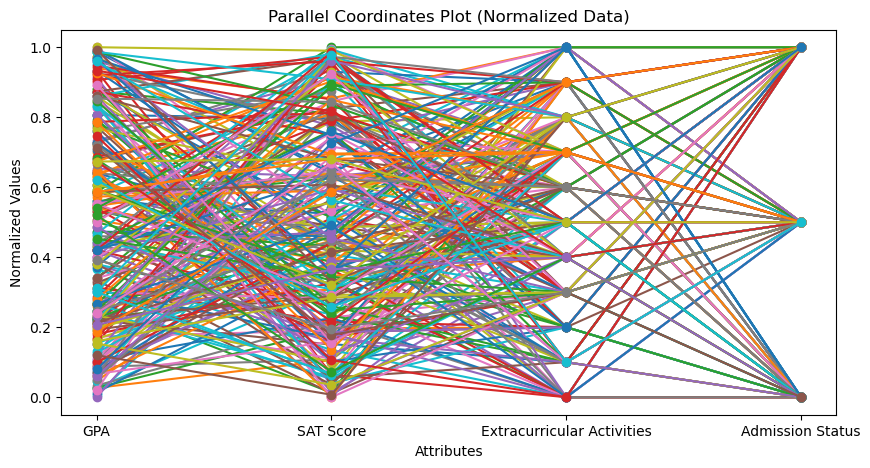

In [37]:
#using normalized Data: 
def normalize(arr):
    return (arr - arr.min()) / (arr.max() - arr.min()) #using min-max normailization formula

Student_GPA_norm = normalize(Student_GPA)
Student_SAT_norm = normalize(Student_SAT)
Student_ECA_norm = normalize(Student_ECA)
Student_AdmissionStatus1_norm = normalize(Student_AdmissionStatus1)

# Combine normalized data into a single array
data_norm = np.array([Student_GPA_norm, Student_SAT_norm, Student_ECA_norm, Student_AdmissionStatus1_norm]).T

# Plotting
plt.figure(figsize=(10, 5))

# Plot each student's data
for i in range(data_norm.shape[0]):
    plt.plot(data_norm[i], marker='o', label=Student_AdmissionStatus[i])

# Adding labels
plt.xticks([0, 1, 2, 3], ['GPA', 'SAT Score', 'Extracurricular Activities', 'Admission Status'])
plt.xlabel('Attributes')
plt.ylabel('Normalized Values')
plt.title('Parallel Coordinates Plot (Normalized Data)')

plt.show()
